- datetime 형식을 잘 다루는게 핵심

In [1]:
# 2011년에 세워진 자전거 스타트업. 
# 2011년부터 성장을 거듭함 (count가 성장하는 추세임)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings  
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv("data/bike/train.csv", parse_dates=['datetime'])
                      # parse_dates 옵션하면 date 형식이라고 알려줌
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [5]:
test = pd.read_csv('data/bike/test.csv', parse_dates=['datetime'])

print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
Categorical = ['season', 'holiday', 'workingday', 'weather']

for var in Categorical:
    train[var] = train[var].astype('category')
    test[var] = test[var].astype('category')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null category
holiday       10886 non-null category
workingday    10886 non-null category
weather       10886 non-null category
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.5 KB


In [8]:
# '년월일시분초' -> '년/월/일/시/분/초'로 열 추가
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train['dayofweek'] = train['datetime'].dt.dayofweek

print(train.shape)

(10886, 19)


In [9]:
# '년월일시분초' -> '년/월/일/시/분/초'로 열 추가
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second
test['dayofweek'] = test['datetime'].dt.dayofweek

print(test.shape)

(6493, 16)


### windspeed가 0값인 것들은 0아닌 값들로 예측해서 집어넣기

In [10]:
# windspeed==0인 것, 0아닌 것 분리
train_wind_0 = train[train.windspeed==0]
print(train_wind_0.shape)

train_wind_not0 = train[train.windspeed!=0]
print(train_wind_not0.shape)

(1313, 19)
(9573, 19)


In [11]:
# windspeed가 0인 것들은 windspeed가 0이 아닌 것들로 예측해서 채워넣고 다시 데이터 합치기

In [12]:
feature_names_wnot0 = ['year','month','hour','season', 'weather', 'atemp', 'humidity']

In [13]:
X_train = train_wind_not0[feature_names_wnot0]
y_train = train_wind_not0['windspeed']

In [14]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [18]:
X_test = train_wind_0[feature_names_wnot0]
X_test.shape

(1313, 7)

In [19]:
train_wind_0['windspeed'] = model.predict(X_test)

In [20]:
train_wind_0[train_wind_0['windspeed']==0]
# windspeed==0인 것들은 없음

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek


In [21]:
train = pd.concat([train_wind_0, train_wind_not0], axis=0).sort_values(by='datetime')

### test 셋도 windspeed가 0인것 예측해서 집어넣기

In [22]:
# windspeed==0인 것, 0아닌 것 분리
test_wind_0 = test[test.windspeed==0]
print(test_wind_0.shape)

test_wind_not0 = test[test.windspeed!=0]
print(test_wind_not0.shape)

(867, 16)
(5626, 16)


In [23]:
X_test = test_wind_0[feature_names_wnot0]
test_wind_0['windspeed'] = model.predict(X_test)

In [24]:
test_wind_0[test_wind_0['windspeed']==0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second,dayofweek


In [25]:
test = pd.concat([test_wind_0, test_wind_not0], axis=0).sort_values(by='datetime')

### 종속변수인 'count'가 right-skew되어있다.(정규분포 아니다) -> 이상적인 예측모델은 아니다.

In [26]:
train['log_count'] = np.log(train['count'] + 1)

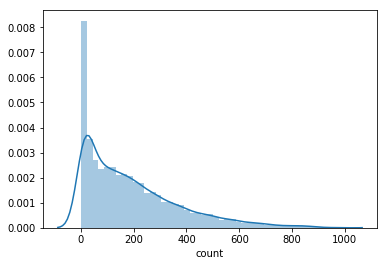

In [27]:
sns.distplot(train['count'])

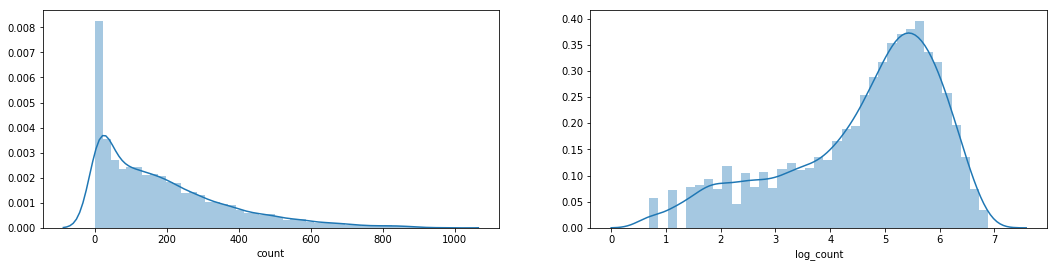

In [28]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,4)
sns.distplot(train['count'], ax=ax1)
sns.distplot(train['log_count'], ax=ax2)

In [29]:
train['count_recover'] = np.exp(train['log_count']) - 1
train[['count', 'log_count', 'count_recover']].head()

,count,log_count,count_recover
0,16,2.833213,16.0
1,40,3.713572,40.0
2,32,3.496508,32.0
3,13,2.639057,13.0
4,1,0.693147,1.0


In [31]:
# 종속변수 : y_train = train['count_recover']

## EDA

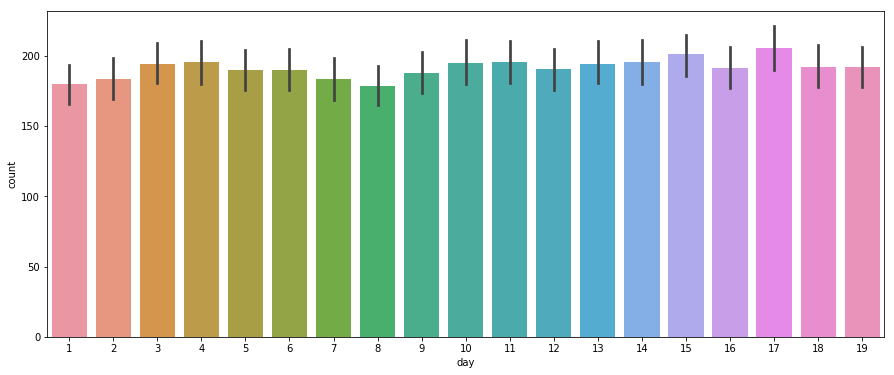

In [32]:
plt.figure(figsize=(15,6))
sns.barplot(data=train, x='day', y='count')

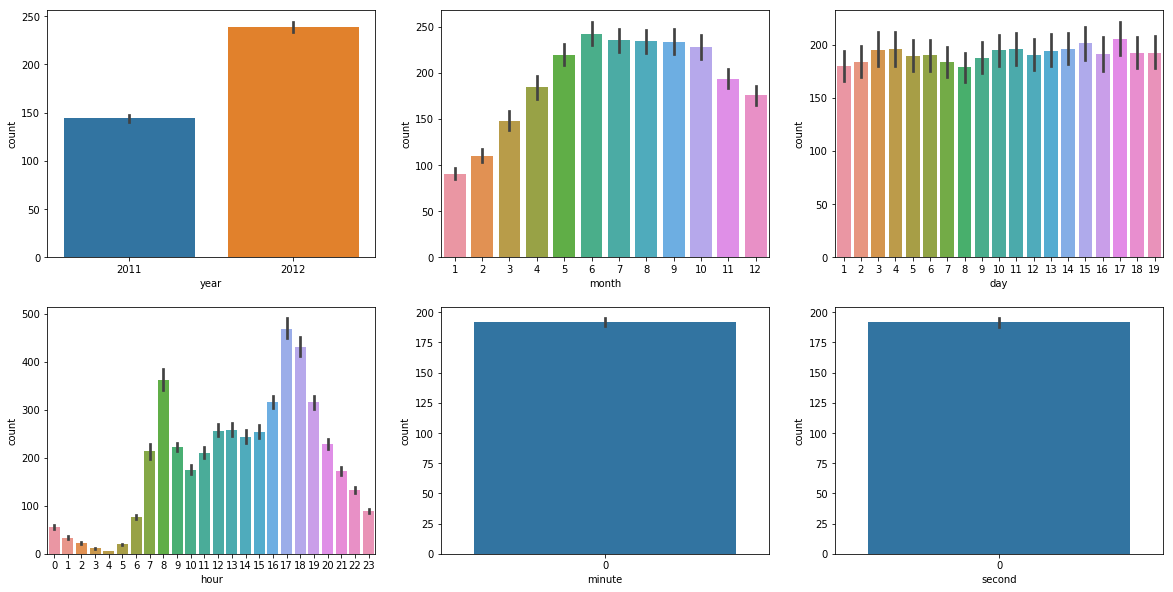

In [33]:
# 바플랏 그려보자
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)  # 테이블위치 ax1~ax6 지정
figure.set_size_inches(20,10)
sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)
sns.barplot(data=train, x='day', y='count', ax=ax3)
sns.barplot(data=train, x='hour', y='count', ax=ax4)
sns.barplot(data=train, x='minute', y='count', ax=ax5)
sns.barplot(data=train, x='second', y='count', ax=ax6)

=> feature로 쓸만한게 year, month, hour (day, minute, second는 버림)

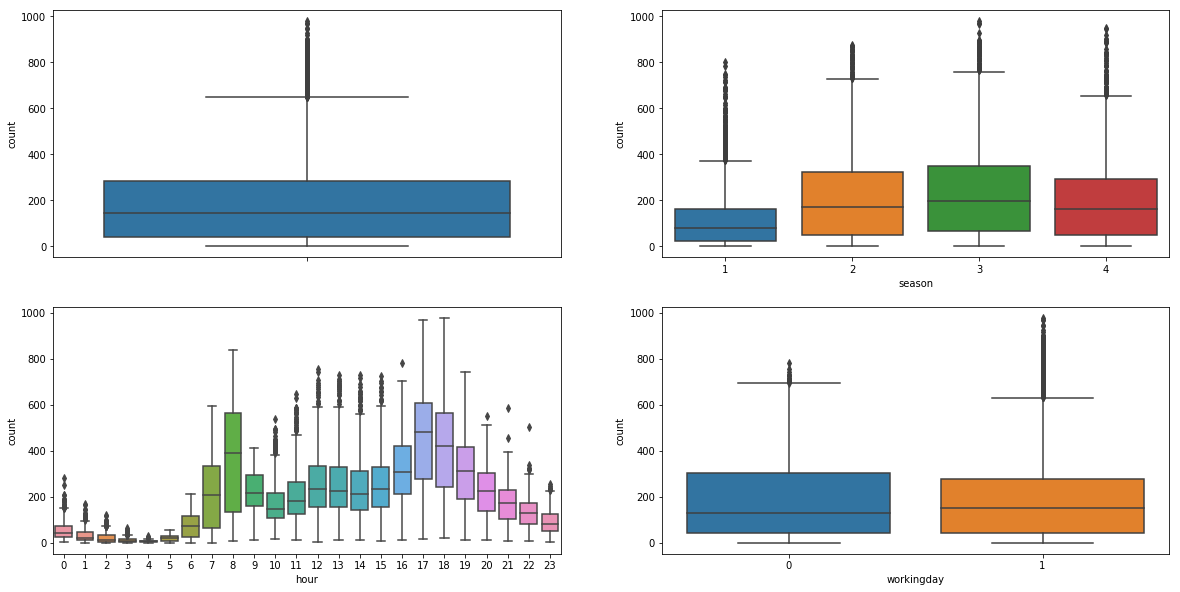

In [34]:
# 박스플랏 그려보자
figure, axis = plt.subplots(nrows=2, ncols=2)          # 테이블 위치 (2, 2) 지정
figure.set_size_inches(20, 10)
sns.boxplot(data=train, y='count', ax=axis[0][0])
sns.boxplot(data=train, y='count', x='season', ax=axis[0][1])
sns.boxplot(data=train, y='count', x='hour', ax=axis[1][0])
sns.boxplot(data=train, y='count', x='workingday', ax=axis[1][1])

=> 봄, 겨울보다 여름이나 가을이 더 많이 자전거를 탄다.

=> 8시, 17시, 18시가 가장 많이 자전거를 탄다.

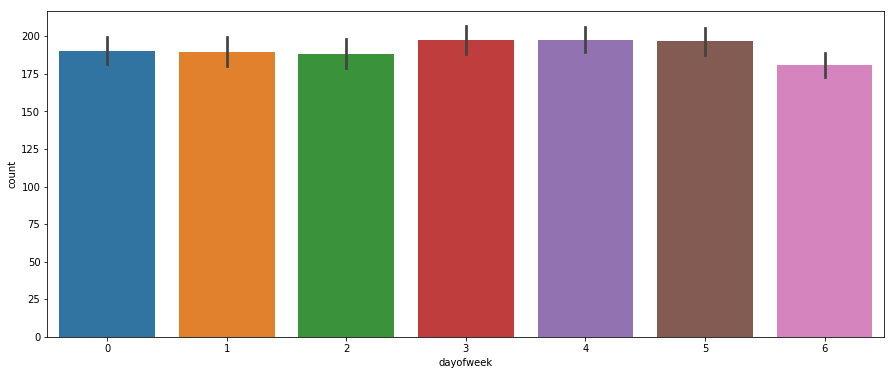

In [35]:
plt.figure(figsize=(15,6))
sns.barplot(data=train, x='dayofweek', y='count')
# => 요일은 큰 의미 없어보이는데...

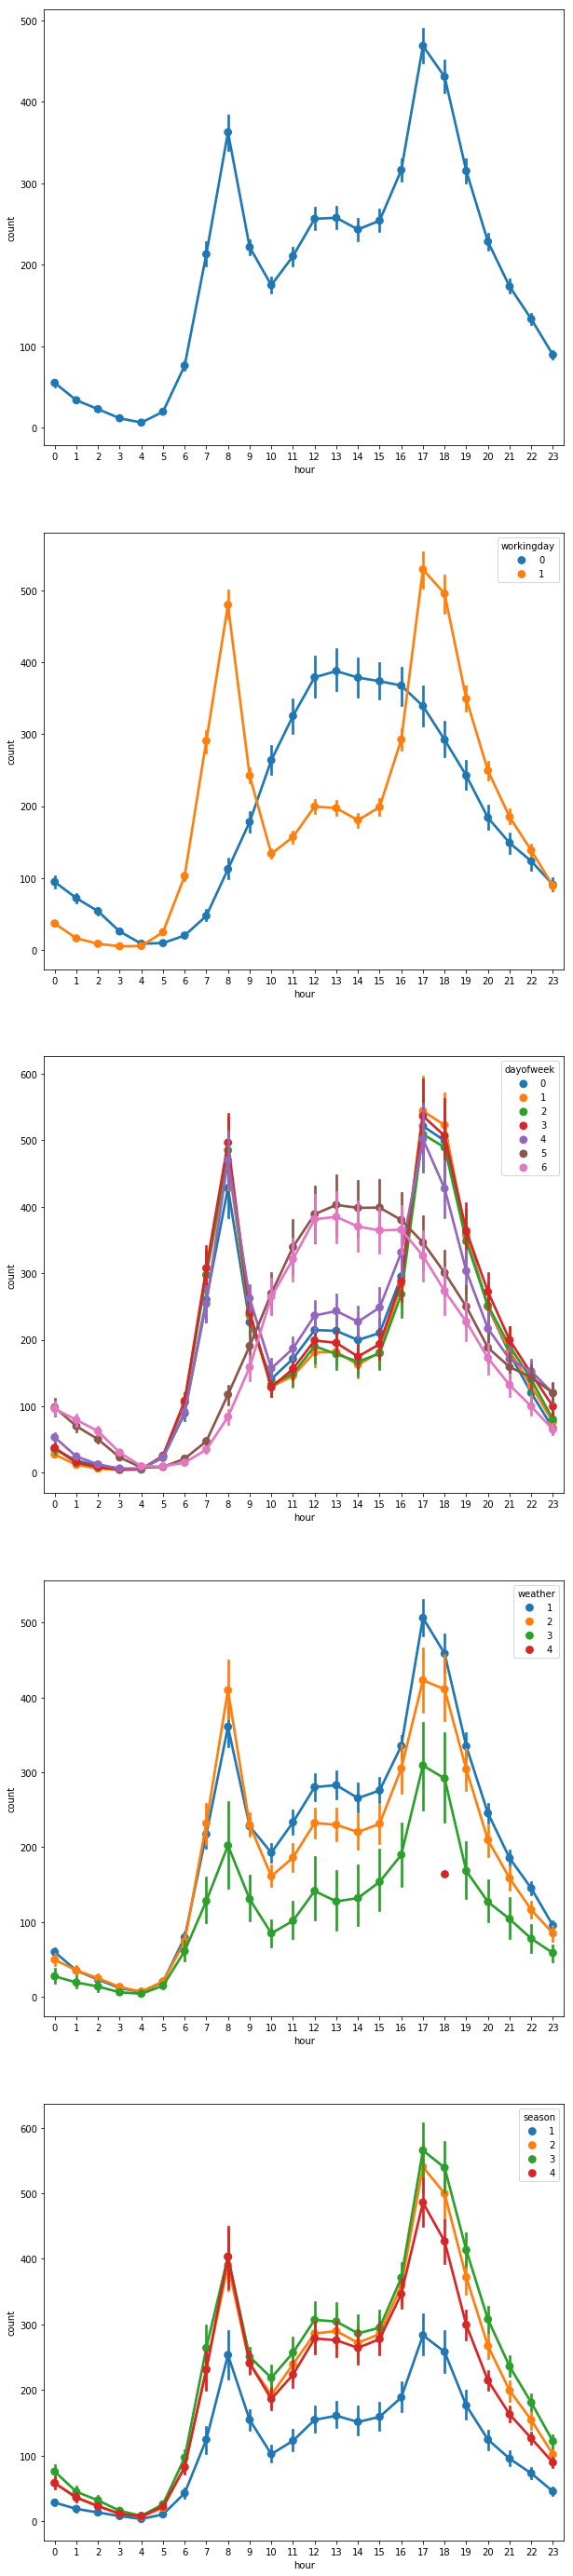

In [36]:
figure, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5)
figure.set_size_inches(10, 50)
sns.pointplot(data=train, x='hour', y='count', ax=ax1)
sns.pointplot(data=train, x='hour', y='count', hue='workingday', ax=ax2)
sns.pointplot(data=train, x='hour', y='count', hue='dayofweek', ax=ax3)
sns.pointplot(data=train, x='hour', y='count', hue='weather', ax=ax4)
sns.pointplot(data=train, x='hour', y='count', hue='season', ax=ax5)

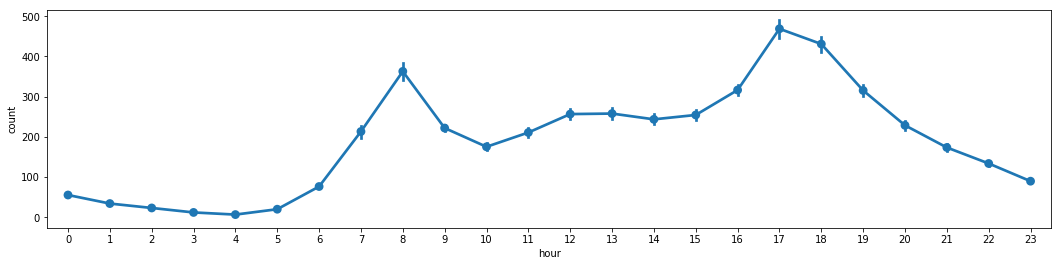

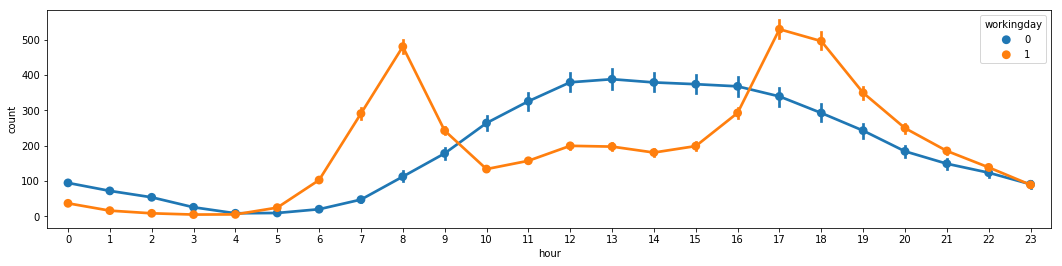

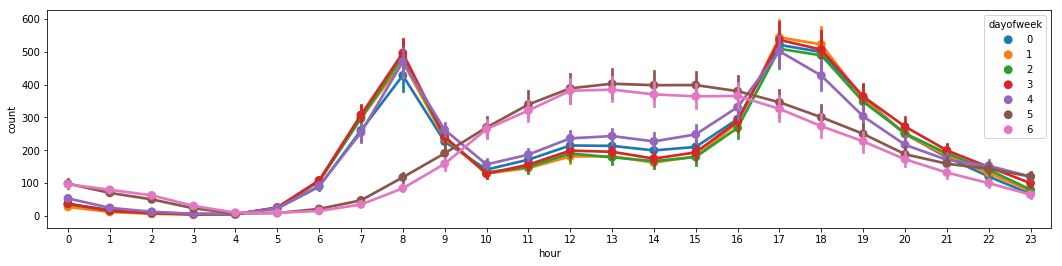

In [37]:
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,4)

sns.pointplot(data=train, x='hour', y='count', ax=ax1)

figure, ax2 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,4)
sns.pointplot(data=train, x='hour', y='count', hue='workingday', ax=ax2)

figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,4)
sns.pointplot(data=train, x='hour', y='count', hue='dayofweek', ax=ax3)

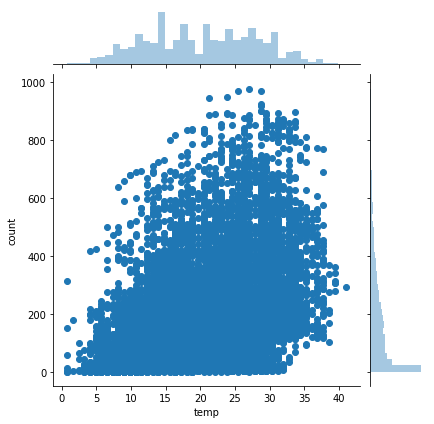

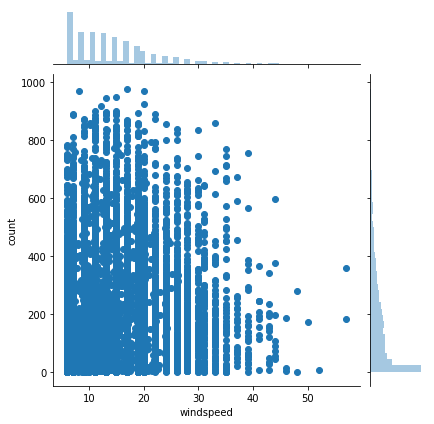

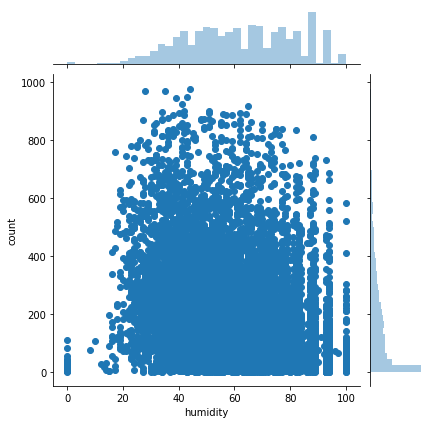

In [38]:
sns.jointplot(data=train, x='temp', y='count')
sns.jointplot(data=train, x='windspeed', y='count')
sns.jointplot(data=train, x='humidity', y='count')

count와
- temp는 양의 상관관계가 있어 보임
- windspeed는 음의 상관관계가 있어 보임
- humidity는 음의 상관관계가 있어 보임

#### pairplot으로 그리면 한번에 그려줘서 편함

In [39]:
train.columns.unique()

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek',
       'log_count', 'count_recover'],
      dtype='object')

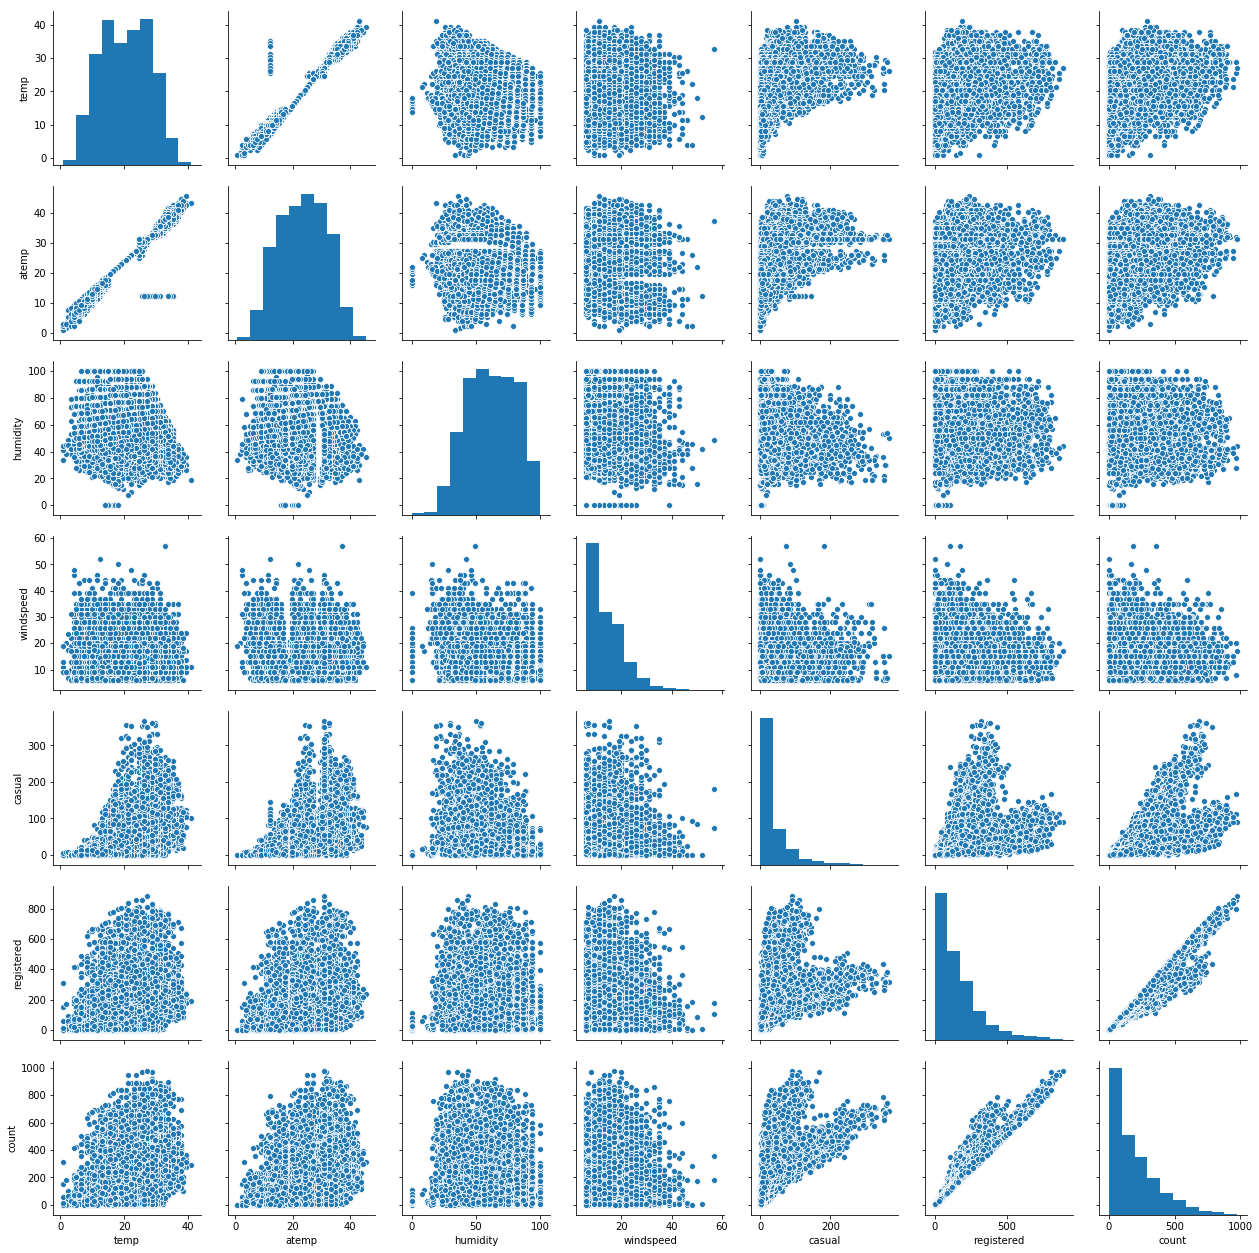

In [40]:
sns.pairplot(train[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']])

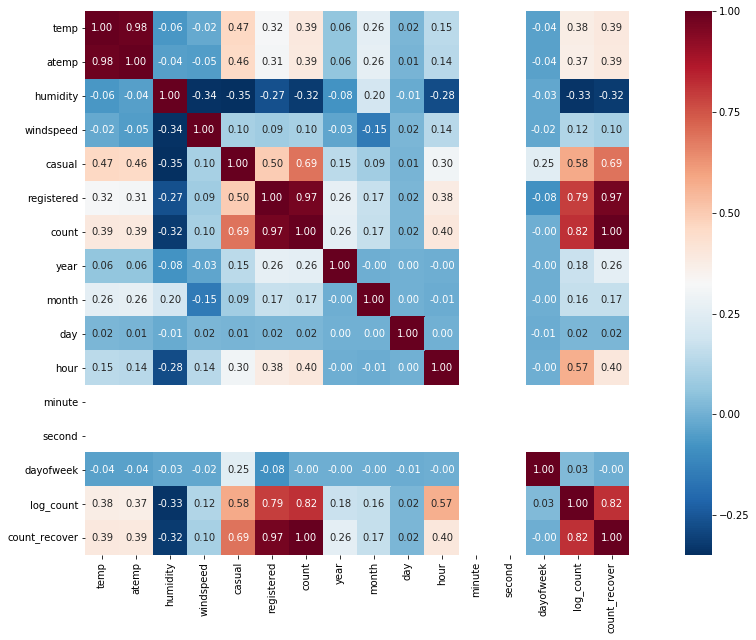

In [41]:
fig=plt.gcf()
fig.set_size_inches(20,10)
sns.heatmap(train.corr(), cmap='RdBu_r', square=True, cbar=True, annot=True, fmt=".2f")

=> 날씨, 시간 등이 count에 영향을 미친다

In [47]:
# year와 month를 합쳐서 그림을 그린다.
def year_month(datetime):
    return str(datetime.year)+"-"+str(datetime.month)

train['year_month'] = train['datetime'].apply(year_month)

In [48]:
train[['datetime', 'year_month']].head()

,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


In [49]:
test['year_month'] = test['datetime'].apply(year_month)

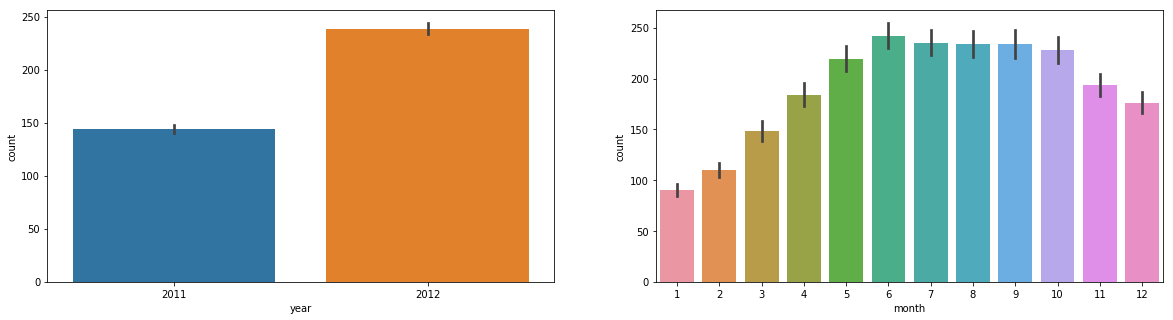

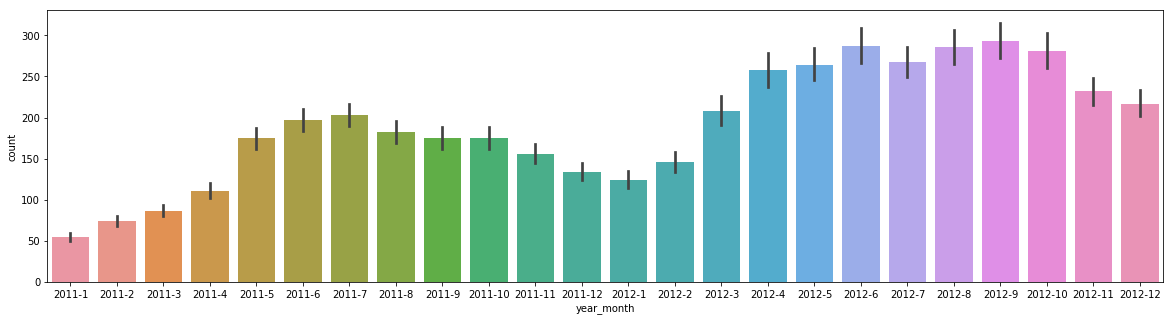

In [50]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(20,5)
sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)

figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(20,5)
sns.barplot(data=train, x='year_month', y='count', ax=ax3)

- 기업 성장세로 점점 증가하는 것 -> 연도_월 합쳐서 feature로 사용해야 할듯

## => EDA 종료

## 학습

In [51]:
train.columns.unique()

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek',
       'log_count', 'count_recover', 'year_month'],
      dtype='object')

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 22 columns):
datetime         10886 non-null datetime64[ns]
season           10886 non-null category
holiday          10886 non-null category
workingday       10886 non-null category
weather          10886 non-null category
temp             10886 non-null float64
atemp            10886 non-null float64
humidity         10886 non-null int64
windspeed        10886 non-null float64
casual           10886 non-null int64
registered       10886 non-null int64
count            10886 non-null int64
year             10886 non-null int64
month            10886 non-null int64
day              10886 non-null int64
hour             10886 non-null int64
minute           10886 non-null int64
second           10886 non-null int64
dayofweek        10886 non-null int64
log_count        10886 non-null float64
count_recover    10886 non-null float64
year_month       10886 non-null object
dtypes: category(4), da

In [ ]:
# 1차 시도
# feature_names = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']

In [ ]:
# 2차 시도
# feature_names = ['year', 'month', 'hour', 'season', 'workingday', 'weather', 'windspeed', 'temp', 
# 'humidity', 'holiday']

In [53]:
# 3차 시도
feature_names = ['year', 'month', 'hour', 'dayofweek', 'season', 'holiday', 'workingday', 
                'weather', 'temp', 'atemp', 'humidity', 'windspeed']

In [54]:
X_train = train[feature_names]
y_train = train['log_count']

X_test = test[feature_names]

In [55]:
# from sklearn.tree import DecisionTreeRegressor
# model = DecisionTreeRegressor()

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

## 자체 evaluate해보기 : rmsle값 구해보기

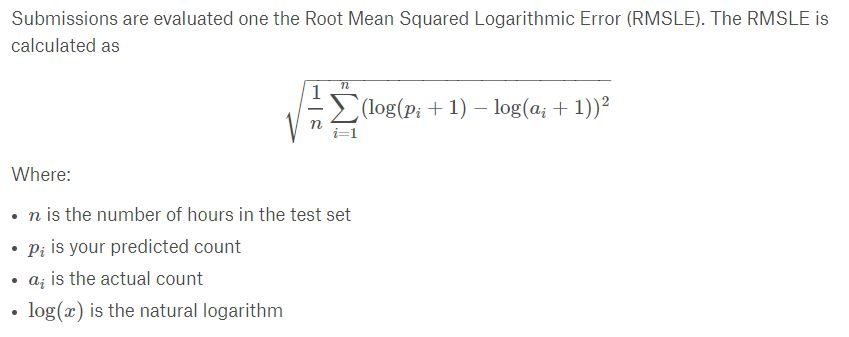

In [58]:
from IPython.display import Image
Image("image/RMSLE.JPG")

### 로그 안 취했을때 rmsle

In [ ]:
'''
def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    log_predict = np.log(predict+1)
    log_actual = np.log(actual+1)
    
    df = log_predict - log_actual
    square_df = df ** 2
    mean = square_df.mean()
    
    score = np.sqrt(mean)
    return score
'''

### 로그 취했을때 rsmle

In [56]:
def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
#     log_predict = np.log(predict+1)
#     log_actual = np.log(actual+1)
    
#     df = log_predict - log_actual
    df = predict - actual   # 차이점
    square_df = df ** 2
    mean = square_df.mean()
    
    score = np.sqrt(mean)
    return score

In [64]:
rmsle(model.predict(X_train), y_train)

0.13455695991746022

In [61]:
# rmsle와 cv
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
rmsle_score = make_scorer(rmsle)
score = cross_val_score(model, X_train, y_train, cv=10, scoring=rmsle_score).mean()
print(score)

0.4137431517429461


In [62]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [65]:
model.predict(X_test)

array([2.5797846 , 1.9176521 , 1.23963624, ..., 4.78114575, 4.72239491,
       3.942603  ])

In [ ]:
'''
# 로그 안 취했을때
submission = pd.read_csv('data/bike/sampleSubmission.csv', index_col=['datetime'])
submission['count'] = model.predict(X_test)
'''

In [67]:
# 로그 취했을때
submission = pd.read_csv('data/bike/sampleSubmission.csv', index_col=['datetime'])
submission['count'] = np.exp(model.predict(X_test)) -1   # 차이점
submission.to_csv('data/bike/submit_{0:.5f}.csv'.format(score), index='datetime')

In [68]:
743/3200

0.2321875

In [69]:
importance = pd.DataFrame(model.feature_importances_, index = feature_names, columns=['Imp'])

In [70]:
importance.sort_values(by='Imp', ascending=False)

,Imp
hour,0.755490
temp,0.049349
workingday,0.038390
year,0.033203
month,0.031205
dayofweek,0.027181
humidity,0.019325
atemp,0.012475
season,0.011699
weather,0.010194


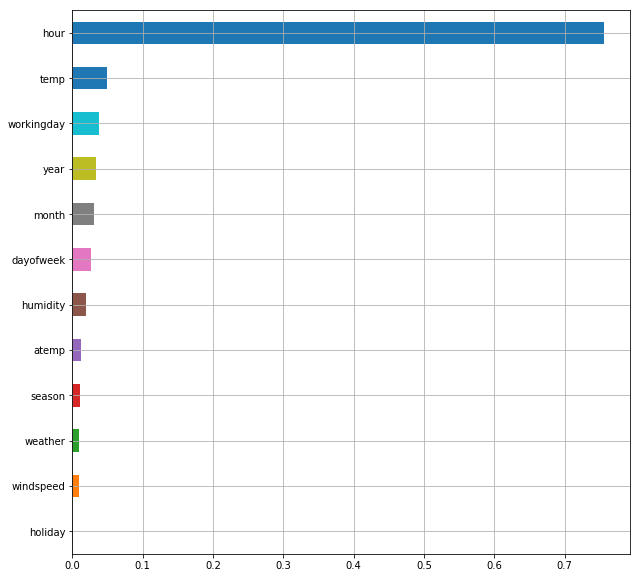

In [72]:
importance['Imp'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))

## 시계열 데이터에 쓰면 좋은 "트리 기반의 앙상블 모델"

- XGboost : 잘못 분류된 것들로 또 트리를 만든다. 그래서 성능이 좋아지는 것. 무거운 경향이 있음.

- LGBM : XGBoost를 보완하여 가볍게 만든것. 빠른 학습속도, 성능이 더 좋기도 함.
         - 마이크로소프트에서 오픈소스한 Boosting Tree 알고리즘